## 602 Assignment 9 

In [49]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library
import plotly.express as px
import plotly.graph_objects as go


In [50]:
# Load datasets here once and assign to variables iris and boston
iris = ds.load_iris()

Q1

Data set: Iris

Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a separate Python list containing target names

In [ ]:
# Creating a DataFrame from the iris dataset
# Using feature names as column names
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head(5)) # Returning first 5 rows of the DataFrame

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [52]:
# Returning the target names as a python list
target_names = iris.target_names.tolist()
print(target_names)

['setosa', 'versicolor', 'virginica']


In [ ]:
iris.keys() # Checking the keys of the iris dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Q2

Data set: Iris

Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in argument new_observations. Return back the target names of each prediction (and not their encoded values, i.e. return setosa instead of 0).

In [ ]:
# Extract features (X) and target labels (y)
X, y = iris.data, iris.target

# Initialize KNN model with 5 neighbors
knn = KNN(n_neighbors=5)
knn.fit(X, y)  # Fit the model on data

# Define new observations
new_observations = np.array([[5.0, 3.5, 1.5, 0.2], [6.0, 3.0, 4.8, 1.8], [6.5, 3.0, 5.2, 2.0]])

# Predict categories (predictions contain encoded values)
predictions = knn.predict(new_observations)

# Convert encoded values to actual target names
label_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
predicted_names = [label_mapping[pred] for pred in predictions]

# Display results
print(predicted_names)


['setosa', 'virginica', 'virginica']


Q3

Data set: Iris

Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

Generate and return back an accuracy score using the test data that was split out

In [65]:
# Using the function parameter split to split the dataset and return the training and testing sets

def split_iris(split):

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = tts(X, y, test_size=split, random_state=123)
    
    # Return the split datasets
    return X_train, X_test, y_train, y_test

# Fitting knn with the training data generated from the split_iris function and the neighbors parameter
def fit_knn(X_train, y_train, neighbors):

    # Initialize KNN model with specified number of neighbors
    knn = KNN(n_neighbors=neighbors)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Return the fitted model
    return knn

# Generating accuracy score for the model using test data generated from the split_iris function
def score_knn(knn, X_test, y_test):

    # Calculate the accuracy score of the model on the test data
    accuracy = knn.score(X_test, y_test)
    
    # Return the accuracy score
    return accuracy

# Example usage of the functions
split = 0.2  # 20% of the data for testing
neighbors = 5  # Number of neighbors
X_train, X_test, y_train, y_test = split_iris(split)
knn_fit = fit_knn(X_train, y_train, neighbors)
accuracy = score_knn(knn_fit, X_test, y_test)
print(f"Accuracy of KNN model with {neighbors} neighbors: {accuracy:.2f}")


Accuracy of KNN model with 5 neighbors: 0.97


Q4

Data set: Iris

Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

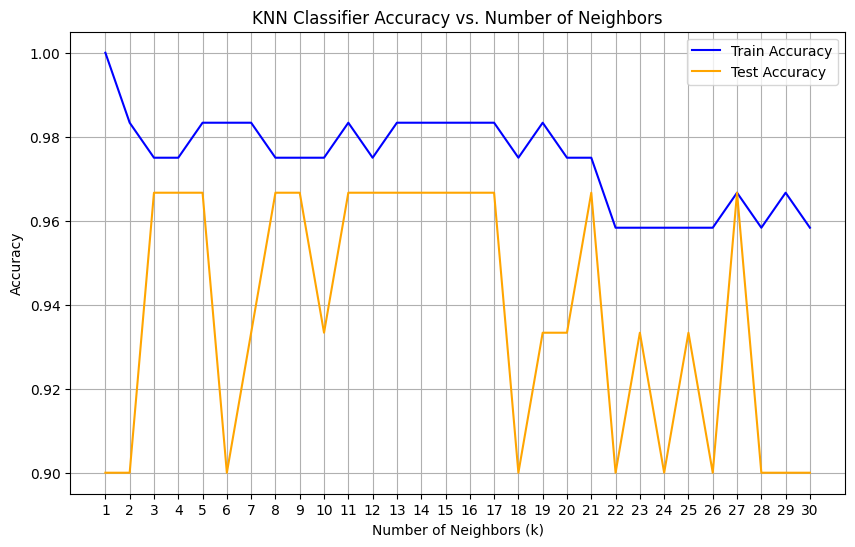

In [56]:
# Extract features (X) and target labels (y)
X, y = iris.data, iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=123)

# Initialize lists to store accuracies for different k values
# Create a list of k values from 1 to 30
train_accuracy = []
test_accuracy = []
k_values = range(1, 31)

# Loop through k values
for k in k_values:
    # Initialize KNN model with k neighbors
    knn = KNN(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Calculate accuracy on training and test sets
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# Plotting the accuracies curves
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, label='Train Accuracy', color='blue')
plt.plot(k_values, test_accuracy, label='Test Accuracy', color='orange')
plt.title('KNN Classifier Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()



With a 20% split the training and testing accuracies are shown above for k being from 1 to 30. What we can note from this is that for the lowest k number (1), our training accuracy is the greatest and the k = 1 test accuracy is low due to underfitting. At the other end of the spectrum k (30), our train accuracy is at its lowest point, and our test accuracy is also at its lowest due to overfitting. Our optial k here is likely around 14 or 15 due to the high test and train accuracies and stability around k 14/15. 